In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
training_df = pd.read_csv("fullData.csv")

In [3]:
training_df['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
2914     1936
2915     1894
2916    20000
2917    10441
2918     9627
Name: LotArea, Length: 2919, dtype: int64

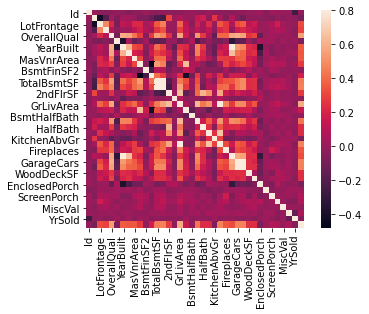

In [4]:
corrmat = training_df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=0.8, square=True);

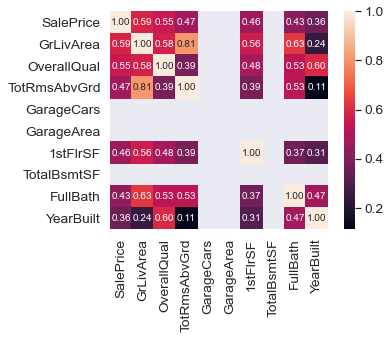

In [5]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(training_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f', annot_kws = {'size':10}, yticklabels=cols.values, xticklabels=cols.values);

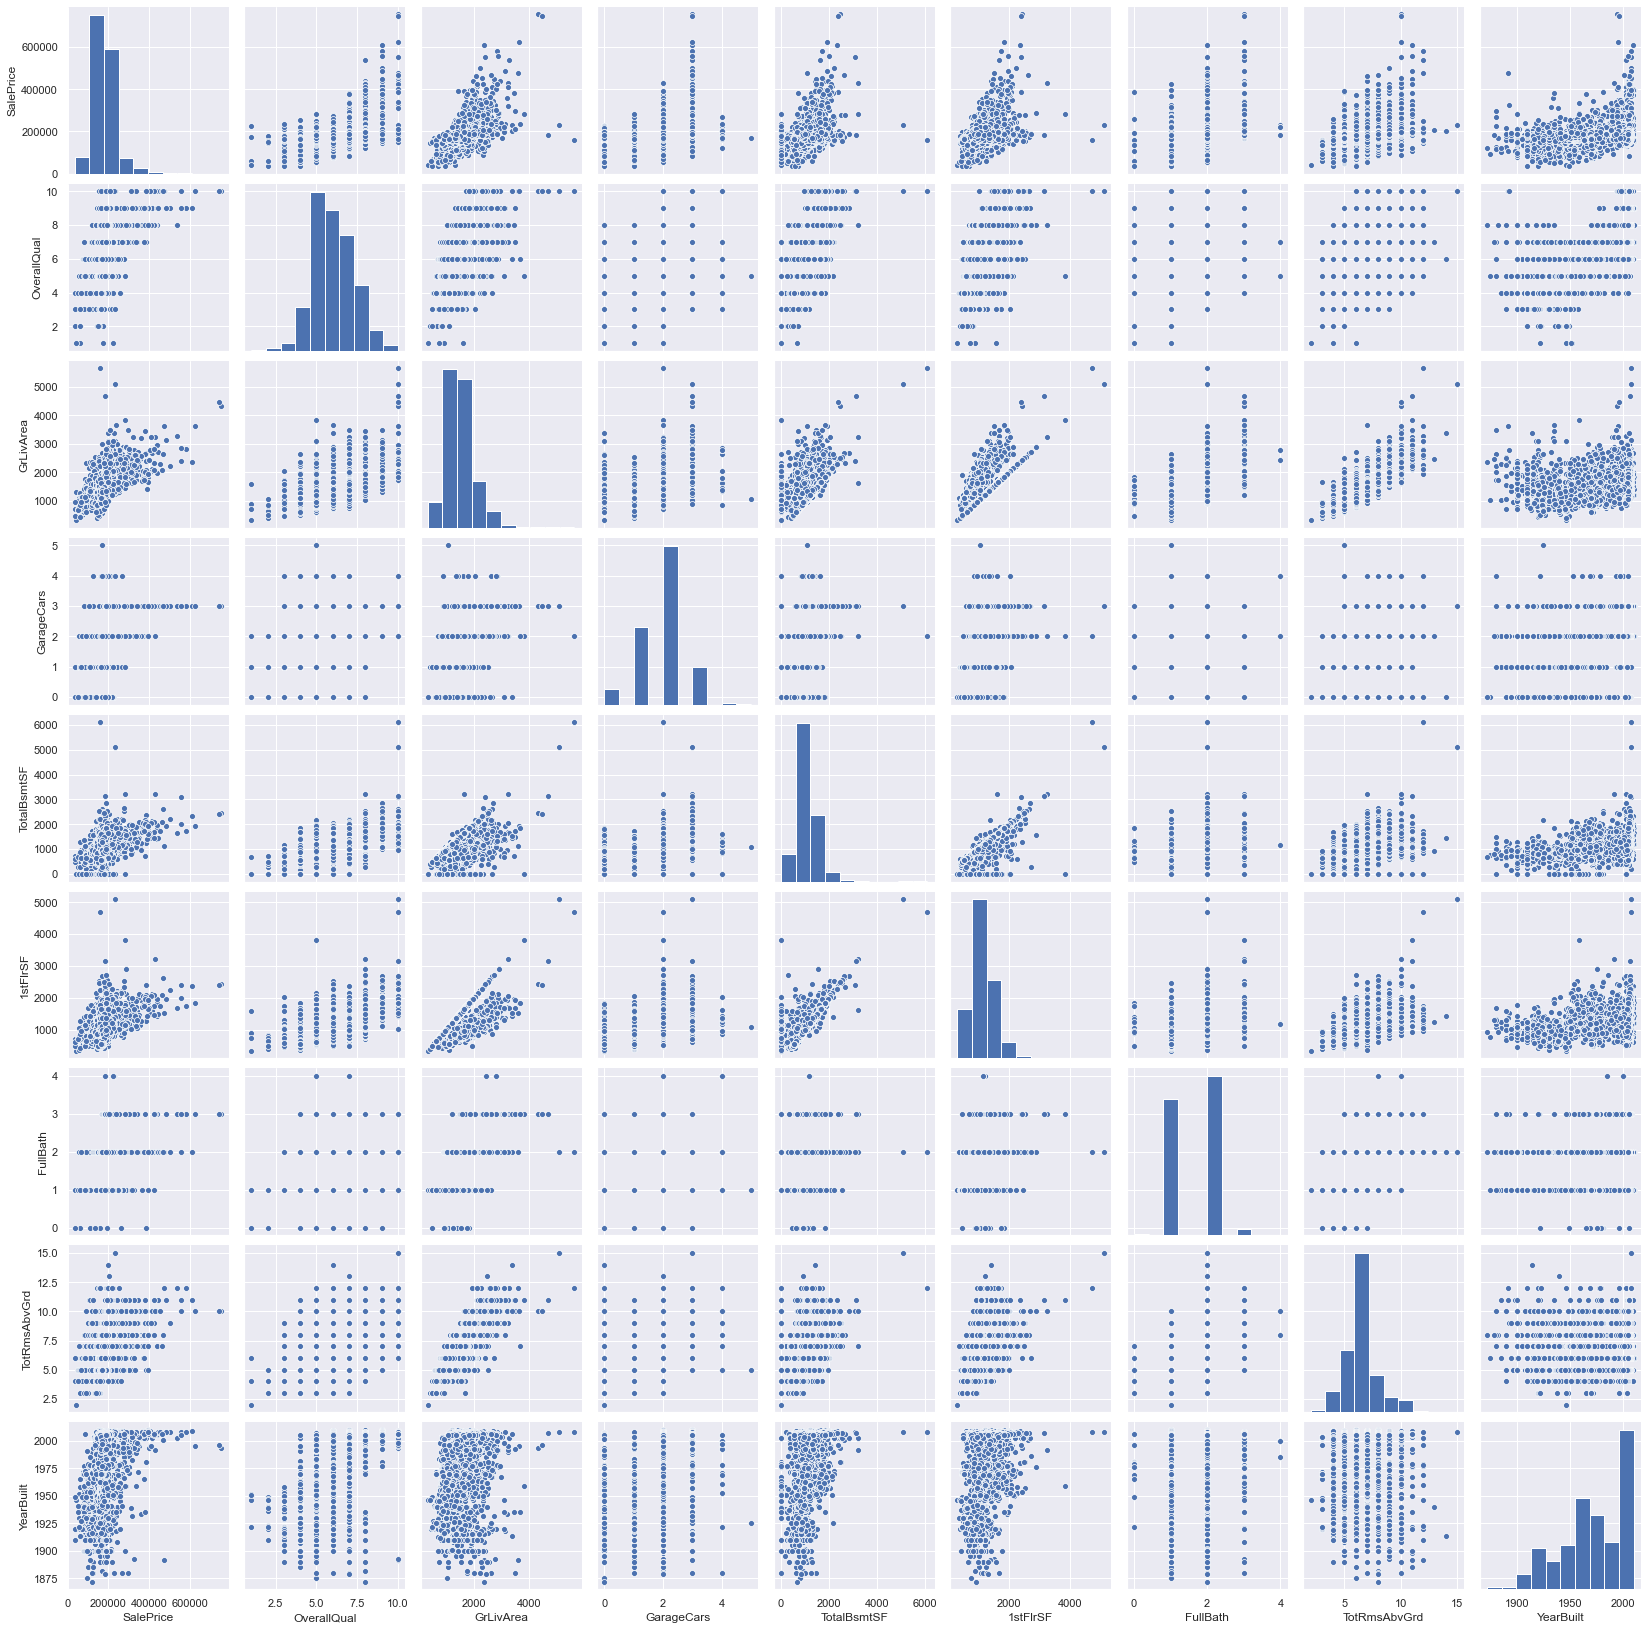

In [6]:
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']
sns.pairplot(training_df[cols], height = 2.5);

In [7]:
total = training_df.isnull().sum().sort_values(ascending=False)
percent= (training_df.isnull().sum()/training_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis = 1, keys=['Total','Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


In [8]:
training_df = training_df.drop((missing_data[missing_data['Total']>4]).index,axis=1)
training_df = training_df.drop(training_df.loc[training_df['Electrical'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['MSZoning'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtFullBath'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtHalfBath'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['GarageArea'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtFinSF2'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Exterior1st'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['TotalBsmtSF'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['GarageCars'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtUnfSF'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtFinSF1'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['KitchenQual'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['SaleType'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Exterior2nd'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Utilities'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Functional'].isnull()].index)
training_df.isnull().sum().max()

0

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
saleprice_scaled = StandardScaler().fit_transform(training_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print(low_range)
print(high_range)

[[-2.5262019 ]
 [-2.5190447 ]
 [-2.47395957]
 [-2.44957982]
 [-2.43738994]
 [-2.22842061]
 [-2.21971356]
 [-2.17617828]
 [-2.17617828]
 [-2.15888607]]
[[ 5.31188919]
 [ 5.60509056]
 [ 6.23483704]
 [ 6.53087691]
 [ 6.55840862]
 [ 7.01730526]
 [ 7.51750817]
 [ 7.74986464]
 [ 9.83955789]
 [10.01369899]]


In [11]:
training_df.sort_values(by='GrLivArea',ascending=False)[:2]
training_df = training_df.drop(training_df[training_df['Id']==1299].index)
training_df = training_df.drop(training_df[training_df['Id']==524].index)


In [12]:
from scipy.stats import norm
from scipy import stats

In [13]:
isinstance(training_df.SaleCondition[0],str)

True

In [14]:
#training_df = pd.get_dummies(training_df)
test = training_df.drop(columns=['Id'])
for var in test.columns:
    if isinstance(test[var][0],str):
        print(var)
    elif test[var].kurtosis() > 1.96 or test[var].kurtosis() < -1.96 or test[var].skew() > 1 or test[var].skew() < -1:
        print(var)
        print(test[var].kurtosis())
        print(test[var].skew())
        if test[var].min() != 0 and test[var].max() !=1:
            try:
                test[var] = np.log(test[test[var]>0])
            except:
                print("flag", var)
test = pd.get_dummies(test)

MSSubClass
1.4411449700421652
1.3725562932955246
flag MSSubClass
MSZoning
LotArea
289.3350699720655
13.514333300130147
flag LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
BsmtFinSF2
18.917236850434755
4.1520920826428735
TotalBsmtSF
3.7779523862259525
0.6953655265387185
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
4.551289106248168
1.1808408072087722
flag 1stFlrSF
LowQualFinSF
174.71794595180245
12.095777806889105
GrLivArea
2.3735583309493444
1.0511610398224003
flag GrLivArea
BsmtHalfBath
14.76102810671064
3.9216200481303485
KitchenAbvGr
19.652748940630975
4.291673185289745
KitchenQual
Functional
PavedDrive
WoodDeckSF
6.728484614716458
1.841757004813402
OpenPorchSF
11.086395467633263
2.52685568951382
EnclosedPorch
28.792892668430863
4.034419380582309
3SsnPorch
148.62047063283944
11.352009440756703
ScreenPorch
17.691188701762915
3.9404881

In [15]:
test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216.0,0.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
X_train = test[training_df.Id<1461]
X_train = X_train.drop(columns='SalePrice')
X_test = test[training_df.Id>1460]
X_test = X_test.drop(columns='SalePrice')
y_train = test[training_df.Id<1461]
y_train = y_train["SalePrice"]
y_test = test[training_df.Id>1460]
y_test = y_test["SalePrice"]
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1457, 219) (1457,)
(1447, 219) (1447,)


In [17]:
X_train = test[training_df.Id<1461]
X_train = X_train[["OverallQual","GrLivArea","GarageCars","1stFlrSF","FullBath","YearBuilt"]]
X_test = test[training_df.Id>1460]
X_test = X_test[["OverallQual","GrLivArea","GarageCars","1stFlrSF","FullBath","YearBuilt"]]
y_train = test[training_df.Id<1461]
y_train = y_train["SalePrice"]
y_test = test[training_df.Id>1460]
y_test = y_test["SalePrice"]
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1457, 6) (1457,)
(1447, 6) (1447,)


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8044277310321668
Testing Score: -17.592147721305057


Text(0.5, 1.0, 'Residual Plot')

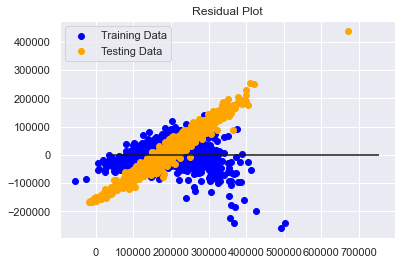

In [20]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot")

# end

In [21]:
from sklearn.model_selection import train_test_split

X = test.drop(columns='SalePrice')
y = test["SalePrice"].values.reshape(-1,1)
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape,y_train.shape)

(2904, 219) (2904, 1)
(2178, 219) (2178, 1)


In [22]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.563033780928579
Testing Score: 0.47393656992412114


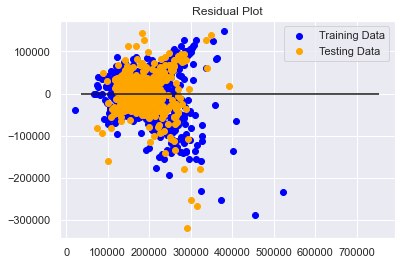

In [23]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train.min(), xmax=y.max())
plt.title("Residual Plot")
plt.savefig('residual.png')

In [24]:
X_test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
141,20,11645,7,5,2005,2005,1300.0,0.0,434.0,1734.0,...,0,0,0,1,0,0,0,0,1,0
820,60,7226,7,5,2003,2003,0.0,0.0,798.0,798.0,...,0,0,0,1,0,0,0,0,1,0
486,20,10289,5,7,1965,1965,836.0,0.0,237.0,1073.0,...,0,0,0,1,0,0,0,0,1,0
1721,20,13072,5,5,2004,2004,0.0,0.0,1114.0,1114.0,...,0,0,0,1,0,0,0,0,1,0
1201,60,10400,7,5,1998,1998,0.0,0.0,866.0,866.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,60,8125,7,6,2007,2007,0.0,0.0,813.0,813.0,...,0,0,0,1,0,0,0,0,1,0
522,50,5000,6,7,1947,1950,399.0,0.0,605.0,1004.0,...,0,0,0,1,0,0,0,0,1,0
1380,30,8212,3,3,1914,1950,203.0,0.0,661.0,864.0,...,0,0,0,1,0,0,0,0,1,0
875,60,9000,8,5,2007,2007,64.0,0.0,1120.0,1184.0,...,0,1,0,0,0,0,0,0,0,1


# end of part 2

In [25]:
X_reduced = test[training_df.Id<1461]
X_reduced = X_reduced.drop(columns='SalePrice')

y_reduced = test[training_df.Id<1461]
y_reduced = y_reduced["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, random_state=42)
print(X_train.shape,y_train.shape)

(1092, 219) (1092,)


In [26]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9335688141810776
Testing Score: 0.8635593208182997


Text(0.5, 1.0, 'Residual Plot')

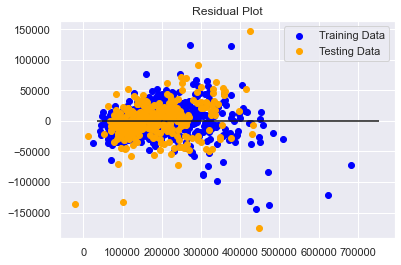

In [27]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train.min(), xmax=y.max())
plt.title("Residual Plot")

# simplest model OLS

In [28]:
X_reduced = test[training_df.Id<1461]
X_reduced = X_reduced[['OverallQual']]

y_reduced = test[training_df.Id<1461]
y_reduced = y_reduced["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, random_state=42)
print(X_train.shape,y_train.shape)

(1092, 1) (1092,)


In [29]:
from sklearn.metrics import mean_squared_error
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(mean_squared_error(y_test,model.predict(X_test)))

Training Score: 0.6176153866437646
Testing Score: 0.6862325568050813
1814796444.733205


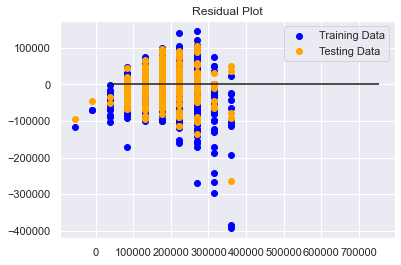

In [30]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train.min(), xmax=y.max())
plt.title("Residual Plot")
plt.savefig('simplemodel.png')

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
test_reduced =  test[training_df.Id<1461]
print(test_reduced.shape)

(1457, 220)


In [33]:
X_reduced = test[training_df.Id<1461]
X_reduced = X_reduced.drop(columns='SalePrice')

y_reduced = test[training_df.Id<1461]
y_reduced = y_reduced["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, random_state=42)
print(X_train.shape,y_train.shape)

(1092, 219) (1092,)


In [34]:
rf = RandomForestRegressor(n_estimators = 100)
rf = rf.fit(X_train,y_train)
rf.score(X_test,y_test)
rf.score(X_train,y_train)
print(mean_squared_error(y_test,rf.predict(X_test)))

671788536.3488405


In [35]:
rf = RandomForestRegressor(n_estimators = 150)
rf = rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))
print(mean_squared_error(y_test,rf.predict(X_test)))


0.9825840456842394
0.8861325291620507
658596950.4780636


In [32]:
rf.score(X_train,y_train)

0.983170350277679

In [33]:
importances = rf.feature_importances_
importances

array([3.00412089e-03, 1.53634339e-02, 5.60890093e-01, 3.02592230e-03,
       1.83451370e-02, 6.49883236e-03, 3.41481012e-02, 7.10785160e-04,
       5.73320496e-03, 5.51963073e-02, 4.25975464e-02, 1.37671014e-02,
       7.16429795e-05, 1.13069587e-01, 8.73465886e-04, 2.98617207e-04,
       8.92546603e-03, 1.10939660e-03, 1.85314287e-03, 1.06640944e-03,
       2.18036841e-02, 3.52959316e-03, 1.25798035e-02, 1.70256140e-02,
       4.19872571e-03, 5.86676552e-03, 4.06437802e-04, 2.59089300e-04,
       7.99630705e-04, 3.78709052e-04, 6.76081468e-05, 4.10278524e-03,
       2.04119470e-03, 5.63276107e-05, 6.25750214e-05, 1.29508238e-05,
       9.74903331e-04, 1.30476901e-03, 1.59873878e-05, 1.62830910e-05,
       5.16580604e-04, 1.45066817e-04, 2.31191453e-05, 1.00105877e-03,
       9.50143329e-05, 3.45607059e-04, 7.26908017e-05, 4.11877797e-04,
       7.10162982e-07, 9.91086552e-08, 5.77509015e-04, 3.39089015e-04,
       8.59607362e-05, 1.19210069e-05, 5.42523458e-04, 6.51383773e-04,
      

In [34]:
sorted(zip(rf.feature_importances_,X_reduced.columns),reverse=True)

[(0.5608900928034378, 'OverallQual'),
 (0.11306958662845215, 'GrLivArea'),
 (0.05519630732810965, 'TotalBsmtSF'),
 (0.04259754638245396, '1stFlrSF'),
 (0.03414810118949423, 'BsmtFinSF1'),
 (0.02180368410374982, 'TotRmsAbvGrd'),
 (0.018345136972503073, 'YearBuilt'),
 (0.017025613984036982, 'GarageArea'),
 (0.015363433925304667, 'LotArea'),
 (0.01376710140739296, '2ndFlrSF'),
 (0.012579803533877422, 'GarageCars'),
 (0.008925466028189178, 'FullBath'),
 (0.0064988323559220795, 'YearRemodAdd'),
 (0.0058667655211844675, 'OpenPorchSF'),
 (0.005733204963178025, 'BsmtUnfSF'),
 (0.0041987257088086, 'WoodDeckSF'),
 (0.004102785243607269, 'MoSold'),
 (0.003552984258433198, 'KitchenQual_Gd'),
 (0.0035295931623072086, 'Fireplaces'),
 (0.0030259223009195713, 'OverallCond'),
 (0.003004120889746839, 'MSSubClass'),
 (0.0020411947044998656, 'YrSold'),
 (0.0018883661436388483, 'ExterQual_Ex'),
 (0.0018531428748718745, 'BedroomAbvGr'),
 (0.001484976296967449, 'KitchenQual_Ex'),
 (0.0013552379025195175, 'Ce

# random forest all data mixed

In [35]:
from sklearn.ensemble import RandomForestRegressor
X = test.drop(columns='SalePrice')
y = test["SalePrice"].values.reshape(-1,1)
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape,y_train.shape)

(2904, 219) (2904, 1)
(2178, 219) (2178, 1)


In [36]:
rf = RandomForestRegressor(n_estimators = 150)
rf = rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))


C:\Users\Chandni\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9295309133028459
0.47524599409038015


In [37]:
X_train.t

AttributeError: 'DataFrame' object has no attribute 't'

In [ ]:
training_df